## Number of Patients and Images in Training Images Folder

In [156]:
files = folders = 0

path = "/kaggle/input/osic-pulmonary-fibrosis-progression/train"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{files:,}',Style.RESET_ALL,"files/images, " + Fore.BLUE + f'{folders:,}',Style.RESET_ALL ,'folders/patients')

33,026  files/images, 176  folders/patients


In [157]:
files = []
for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files.append(len(filenames))

print(Fore.YELLOW +f'{round(np.mean(files)):,}',Style.RESET_ALL,'average files/images per patient')
print(Fore.BLUE +f'{round(np.max(files)):,}',Style.RESET_ALL, 'max files/images per patient')
print(Fore.GREEN +f'{round(np.min(files)):,}',Style.RESET_ALL,'min files/images per patient')

187.0  average files/images per patient
1,018  max files/images per patient
0  min files/images per patient


# 5. <a id='details'>Data Exploration in Details 🎠</a> 

## Creating Individual Patient Dataframe

for `175` unique patients, we make new dataframe


In [158]:
patient_df = train_df[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates()
patient_df.head()

Patient  Age   Sex SmokingStatus
0   ID00007637202177411956430   79  Male     Ex-smoker
9   ID00009637202177434476278   69  Male     Ex-smoker
18  ID00010637202177584971671   60  Male     Ex-smoker
27  ID00011637202177653955184   72  Male     Ex-smoker
36  ID00012637202177665765362   65  Male  Never smoked

In [159]:
# Creating unique patient lists and their properties. 
train_dir = '../input/osic-pulmonary-fibrosis-progression/train/'
test_dir = '../input/osic-pulmonary-fibrosis-progression/test/'

patient_ids = os.listdir(train_dir)
patient_ids = sorted(patient_ids)

#Creating new rows
no_of_instances = []
age = []
sex = []
smoking_status = []

for patient_id in patient_ids:
    patient_info = train_df[train_df['Patient'] == patient_id].reset_index()
    no_of_instances.append(len(os.listdir(train_dir + patient_id)))
    age.append(patient_info['Age'][0])
    sex.append(patient_info['Sex'][0])
    smoking_status.append(patient_info['SmokingStatus'][0])

#Creating the dataframe for the patient info    
patient_df = pd.DataFrame(list(zip(patient_ids, no_of_instances, age, sex, smoking_status)), 
                                 columns =['Patient', 'no_of_instances', 'Age', 'Sex', 'SmokingStatus'])
print(patient_df.info())
patient_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient          176 non-null    object
 1   no_of_instances  176 non-null    int64 
 2   Age              176 non-null    int64 
 3   Sex              176 non-null    object
 4   SmokingStatus    176 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.0+ KB
None


Patient  no_of_instances  Age   Sex SmokingStatus
0  ID00007637202177411956430               30   79  Male     Ex-smoker
1  ID00009637202177434476278              394   69  Male     Ex-smoker
2  ID00010637202177584971671              106   60  Male     Ex-smoker
3  ID00011637202177653955184               31   72  Male     Ex-smoker
4  ID00012637202177665765362               49   65  Male  Never smoked

## Exploring the 'SmokingStatus' column

In [167]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [168]:
patient_df['SmokingStatus'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the SmokingStatus column in the Unique Patient Set')

`118` : Ex-smoker

`49` : Never smoked

`9` : Currently smokes

## Weeks distribution

In [169]:
train_df['Weeks'].value_counts().head()

8     45
12    44
18    42
10    41
6     40
Name: Weeks, dtype: int64

In [170]:
train_df['Weeks'].value_counts().iplot(kind='barh',
                                      xTitle='Counts(Weeks)', 
                                      linecolor='black', 
                                      opacity=0.7,
                                      color='#FB8072',
                                      theme='pearl',
                                      bargap=0.2,
                                      gridcolor='white',
                                      title='Distribution of the Weeks in the training set')

In [171]:
train_df['Weeks'].iplot(kind='hist',
                              xTitle='Weeks', 
                              yTitle='Counts',
                              linecolor='black', 
                              opacity=0.7,
                              color='#FB8072',
                              theme='pearl',
                              bargap=0.2,
                              gridcolor='white',
                              title='Distribution of the Weeks in the training set')

There are some negative values for Weeks. 

Because Weeks is the relative number of weeks pre/post the baseline CT.

## Distribution Age over Week

In [172]:
fig = px.scatter(train_df, x="Weeks", y="Age", color='Sex')
fig.show()

## FVC - The forced vital capacity

 The forced vital capacity (FVC), i.e. the volume of air exhaled
 - the recorded lung capacity in ml

In [173]:
train_df['FVC'].value_counts()

2095    4
2889    4
2474    4
2965    4
2694    4
       ..
3313    1
3661    1
3299    1
5895    1
4096    1
Name: FVC, Length: 1202, dtype: int64

In [174]:
train_df['FVC'].iplot(kind='hist',
                      xTitle='Lung Capacity(ml)', 
                      linecolor='black', 
                      opacity=0.8,
                      color='#FB8072',
                      bargap=0.5,
                      gridcolor='white',
                      title='Distribution of the FVC in the training set')

### FVC vs Percent

In [175]:
fig = px.scatter(train_df, x="FVC", y="Percent", color='Age')
fig.show()

FVC seems to related Percent linearly. Makes sense as both terms are proportional.

### FVC vs Age

In [176]:
fig = px.scatter(train_df, x="FVC", y="Age", color='Sex')
fig.show()

Males have higher FVC than females irrespective of age

### FVC vs Weeks

In [177]:
fig = px.scatter(train_df, x="FVC", y="Weeks", color='SmokingStatus')
fig.show()

* ###### Pick one patient for FVC vs Weeks

In [178]:
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

Person never smoked has FVC lower than smoker. Some Ex-smoker have very high FVC.

## Percent

A computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics

In [179]:
train_df['Percent'].value_counts()

83.282505     2
86.559510     2
121.595445    2
80.474296     2
61.885639     2
             ..
82.589902     1
65.508606     1
52.391737     1
54.591498     1
52.749977     1
Name: Percent, Length: 1536, dtype: int64

In [180]:
train_df['Percent'].iplot(kind='hist',bins=30,color='blue',xTitle='Percent distribution',yTitle='Count')

### Percent vs SmokingStatus In Patient Dataframe

In [181]:
df = train_df
fig = px.violin(df, y='Percent', x='SmokingStatus', box=True, color='Sex', points="all",
          hover_data=train_df.columns)
fig.show()

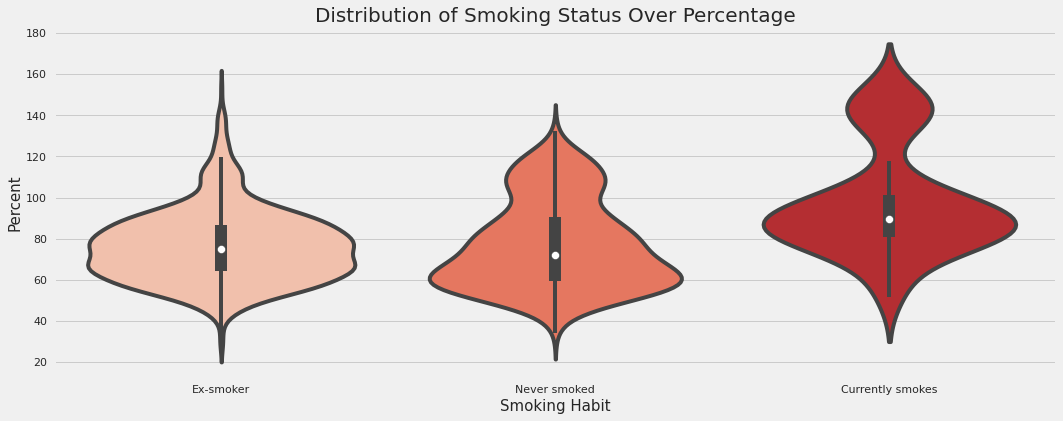

In [182]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = train_df['SmokingStatus'], y = train_df['Percent'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Smoking Habit', fontsize = 15)
ax.set_ylabel(ylabel = 'Percent', fontsize = 15)
ax.set_title(label = 'Distribution of Smoking Status Over Percentage', fontsize = 20)
plt.show()

In [183]:
fig = px.scatter(train_df, x="Age", y="Percent", color='SmokingStatus')
fig.show()

### Pick one patient for FVC vs Weeks

In [184]:
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="Percent", color='SmokingStatus')
fig.show()

In [185]:
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="Percent", color='SmokingStatus')
fig.show()

## Age Distribution of Unique Patients

In [186]:
patient_df['Age'].iplot(kind='hist',bins=30,color='red',xTitle='Ages of distribution',yTitle='Count')

### Distribution of Age vs SmokingStatus In Patient Dataframe

In [187]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

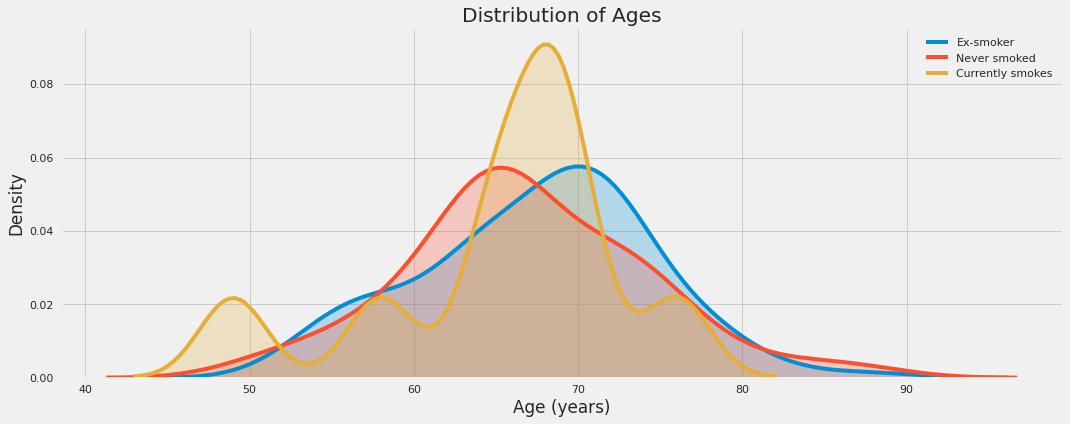

In [188]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Ex-smoker', 'Age'], label = 'Ex-smoker',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Never smoked', 'Age'], label = 'Never smoked',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Currently smokes', 'Age'], label = 'Currently smokes', shade=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

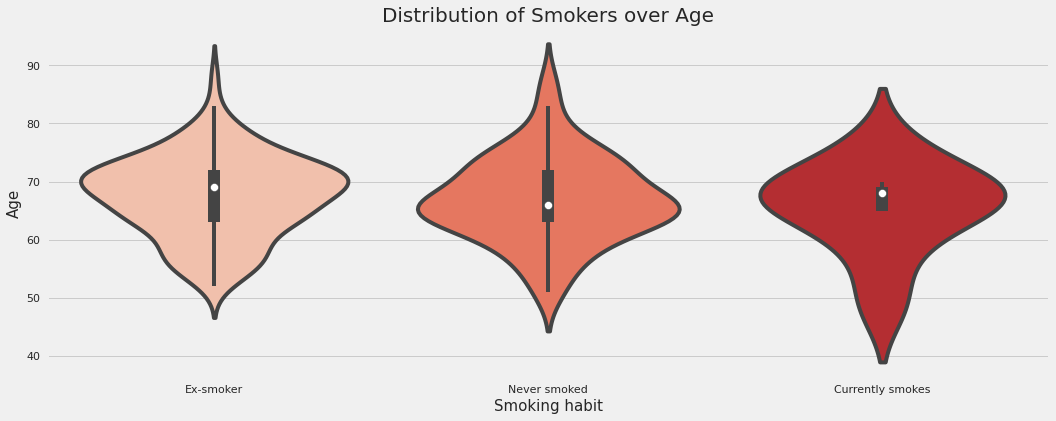

In [189]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = patient_df['SmokingStatus'], y = patient_df['Age'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Smoking habit', fontsize = 15)
ax.set_ylabel(ylabel = 'Age', fontsize = 15)
ax.set_title(label = 'Distribution of Smokers over Age', fontsize = 20)
plt.show()

### Distribution of Age vs Gender In Patient Dataframe

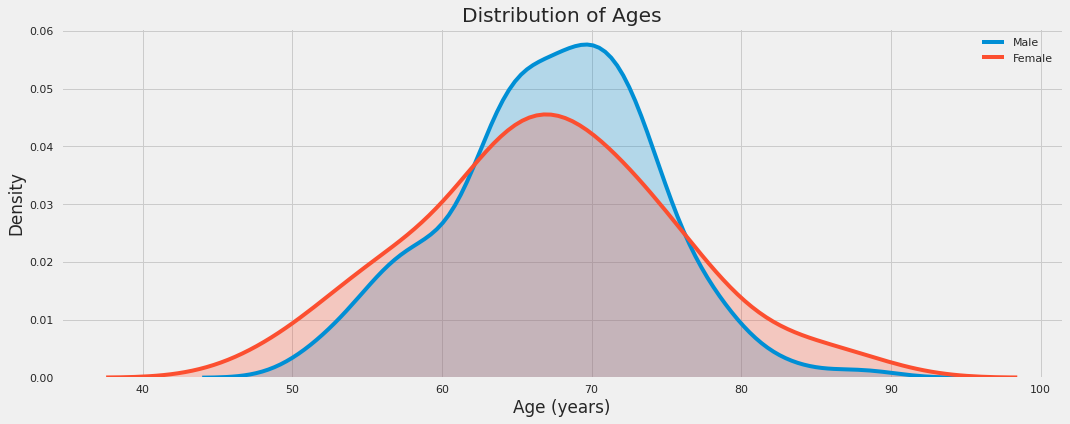

In [190]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['Sex'] == 'Male', 'Age'], label = 'Male',shade=True)
sns.kdeplot(patient_df.loc[patient_df['Sex'] == 'Female', 'Age'], label = 'Female',shade=True)
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

## Gender Distribution

In [191]:
patient_df['Sex'].value_counts()

Male      139
Female     37
Name: Sex, dtype: int64

In [192]:
patient_df['Sex'].value_counts().iplot(kind='bar',
                                          yTitle='Count', 
                                          linecolor='black', 
                                          opacity=0.7,
                                          color='blue',
                                          theme='pearl',
                                          bargap=0.8,
                                          gridcolor='white',
                                          title='Distribution of the Sex column in Patient Dataframe')

`139` : Male

`37` : Female

### Gender vs SmokingStatus In Patient Dataframe

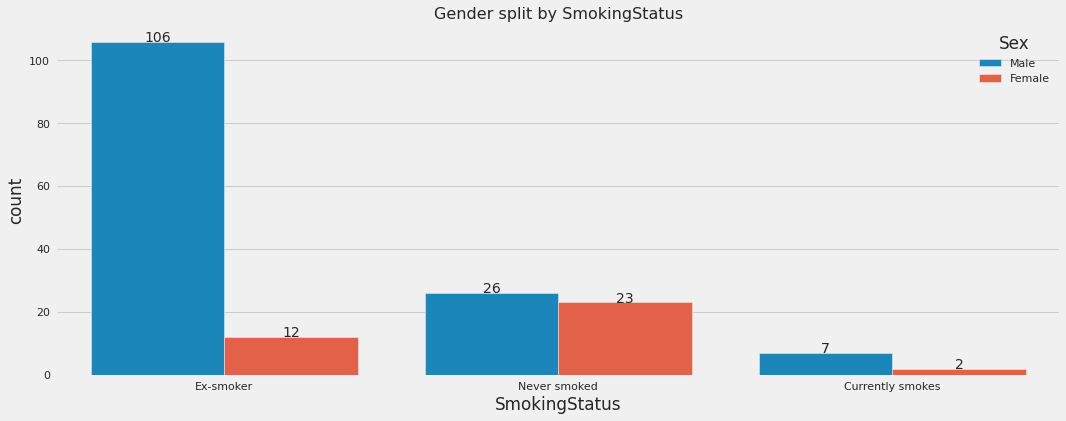

In [193]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=patient_df, x='SmokingStatus', hue='Sex')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Gender split by SmokingStatus', fontsize=16)
sns.despine(left=True, bottom=True);

In [194]:
fig = px.box(patient_df, x="Sex", y="Age", points="all")
fig.show()

## Patient Overlap

In [195]:
# Extract patient id's for the training set
ids_train = train_df.Patient.values
# Extract patient id's for the validation set
ids_test = test_df.Patient.values
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
# Create a "set" datastructure of the training set id's to identify unique id's
ids_train_set = set(ids_train)
print(Fore.YELLOW + "There are",Style.RESET_ALL,f'{len(ids_train_set)}', Fore.BLUE + 'unique Patient IDs',Style.RESET_ALL,'in the training set')
# Create a "set" datastructure of the validation set id's to identify unique id's
ids_test_set = set(ids_test)
print(Fore.YELLOW + "There are", Style.RESET_ALL, f'{len(ids_test_set)}', Fore.BLUE + 'unique Patient IDs',Style.RESET_ALL,'in the test set')

# Identify patient overlap by looking at the intersection between the sets
patient_overlap = list(ids_train_set.intersection(ids_test_set))
n_overlap = len(patient_overlap)
print(Fore.YELLOW + "There are", Style.RESET_ALL, f'{n_overlap}', Fore.BLUE + 'Patient IDs',Style.RESET_ALL, 'in both the training and test sets')
print('')
print(Fore.CYAN + 'These patients are in both the training and test datasets:', Style.RESET_ALL)
print(f'{patient_overlap}')

There are  176 unique Patient IDs  in the training set
There are  5 unique Patient IDs  in the test set
There are  5 Patient IDs  in both the training and test sets

These patients are in both the training and test datasets: 
['ID00421637202311550012437', 'ID00422637202311677017371', 'ID00419637202311204720264', 'ID00426637202313170790466', 'ID00423637202312137826377']


`5` patients are in both the training and test datasets.

## Heatmap for train.csv

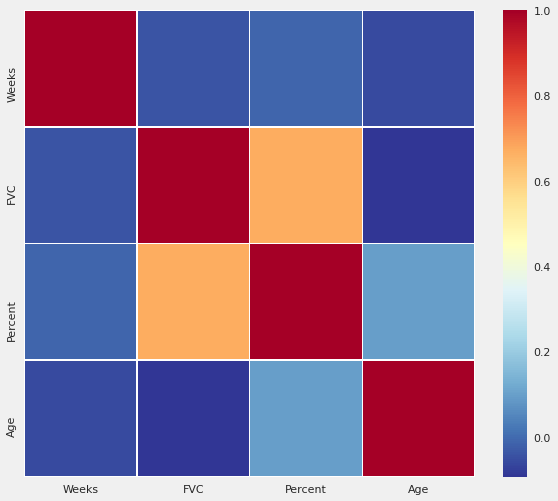

In [196]:
corrmat = train_df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5) 

Please compare with the previous visualization information. And we may compare to Pandas Profiling below.

In [197]:
# 6. <a id='visual'>Visualising Images : DECOM 🗺️</a>  

`1` type of images containing the information:

- `.dcm` files: [DICOM files](https://en.wikipedia.org/wiki/DICOM). It's saved in the "Digital Imaging and Communications in Medicine" format. It contains an image from a medical scan, such as an ultrasound or MRI + information about the patient.

In [198]:
print(Fore.YELLOW + 'Train .dcm number of images:',Style.RESET_ALL, len(list(os.listdir('../input/osic-pulmonary-fibrosis-progression/train'))), '\n' +
      Fore.BLUE + 'Test .dcm number of images:',Style.RESET_ALL, len(list(os.listdir('../input/osic-pulmonary-fibrosis-progression/test'))), '\n' +
      '--------------------------------', '\n' +
      'There is the same number of images as in train/ test .csv datasets')

Train .dcm number of images:  176 
Test .dcm number of images:  5 
-------------------------------- 
There is the same number of images as in train/ test .csv datasets


Let's look at the DICOM images.

In [199]:
def plot_pixel_array(dataset, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.grid(False)
    plt.imshow(dataset.pixel_array, cmap='gray') # cmap=plt.cm.bone)
    plt.show()

Filename.........:  ../input/osic-pulmonary-fibrosis-progression/train/ID00015637202177877247924/377.dcm

Patient's name......:  ID00015637202177877247924, 
Patient id..........:  ID00015637202177877247924
Patient's Sex.......:  
Modality............:  CT
Body Part Examined..:  Chest
Image size.......:   768 x 768, 1179648 bytes
Pixel spacing....:  [0.522135417, 0.522135417]


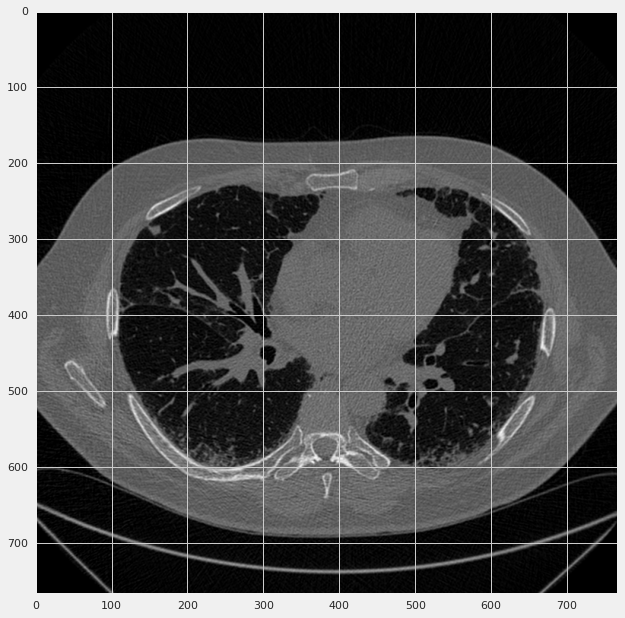

In [200]:
# https://www.kaggle.com/schlerp/getting-to-know-dicom-and-the-data
def show_dcm_info(dataset):
    print(Fore.YELLOW + "Filename.........:",Style.RESET_ALL,file_path)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print(Fore.BLUE + "Patient's name......:",Style.RESET_ALL, display_name)
    print(Fore.BLUE + "Patient id..........:",Style.RESET_ALL, dataset.PatientID)
    print(Fore.BLUE + "Patient's Sex.......:",Style.RESET_ALL, dataset.PatientSex)
    print(Fore.YELLOW + "Modality............:",Style.RESET_ALL, dataset.Modality)
    print(Fore.GREEN + "Body Part Examined..:",Style.RESET_ALL, dataset.BodyPartExamined)
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print(Fore.BLUE + "Image size.......:",Style.RESET_ALL," {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print(Fore.YELLOW + "Pixel spacing....:",Style.RESET_ALL,dataset.PixelSpacing)
            dataset.PixelSpacing = [1, 1]
        plt.figure(figsize=(10, 10))
        plt.imshow(dataset.pixel_array, cmap='gray')
        plt.show()
for file_path in glob.glob('../input/osic-pulmonary-fibrosis-progression/train/*/*.dcm'):
    dataset = pydicom.dcmread(file_path)
    show_dcm_info(dataset)
    break # Comment this out to see all

total images for patient ID00123637202217151272140:  258


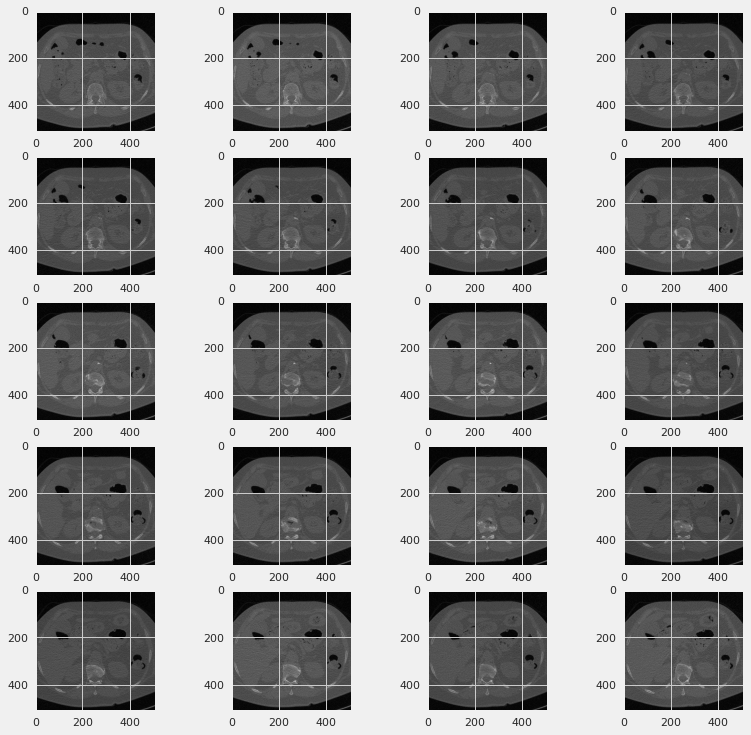

In [203]:
imdir = "/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140"
print("total images for patient ID00123637202217151272140: ", len(os.listdir(imdir)))

# view first (columns*rows) images in order
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
imglist = os.listdir(imdir)
for i in range(1, columns*rows +1):
    filename = imdir + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='gray')
plt.show()

total images for patient ID00123637202217151272140:  258


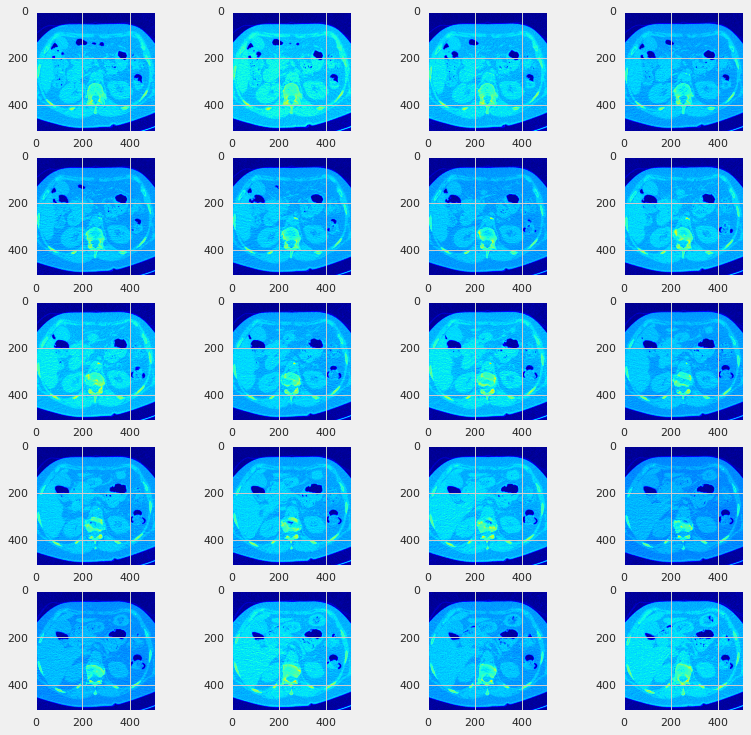

In [204]:
imdir = "/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140"
print("total images for patient ID00123637202217151272140: ", len(os.listdir(imdir)))

# view first (columns*rows) images in order
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
imglist = os.listdir(imdir)
for i in range(1, columns*rows +1):
    filename = imdir + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='jet')
plt.show()

# Visualization using gif

In [ ]:
apply_resample = False

def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [ ]:
def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [ ]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

In [ ]:
def set_lungwin(img, hu=[-1200., 600.]):
    lungwin = np.array(hu)
    newimg = (img-lungwin[0]) / (lungwin[1]-lungwin[0])
    newimg[newimg < 0] = 0
    newimg[newimg > 1] = 1
    newimg = (newimg * 255).astype('uint8')
    return newimg

In [ ]:
scans = load_scan('../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/')
scan_array = set_lungwin(get_pixels_hu(scans))

In [ ]:
# Resample to 1mm (An optional step, it may not be relevant to this competition because of the large slice thickness on the z axis)

from scipy.ndimage.interpolation import zoom

def resample(imgs, spacing, new_spacing):
    new_shape = np.round(imgs.shape * spacing / new_spacing)
    true_spacing = spacing * imgs.shape / new_shape
    resize_factor = new_shape / imgs.shape
    imgs = zoom(imgs, resize_factor, mode='nearest')
    return imgs, true_spacing, new_shape

spacing_z = (scans[-1].ImagePositionPatient[2] - scans[0].ImagePositionPatient[2]) / len(scans)

if apply_resample:
    scan_array_resample = resample(scan_array, np.array(np.array([spacing_z, *scans[0].PixelSpacing])), np.array([1.,1.,1.]))[0]

In [ ]:
import imageio
from IPython.display import Image

imageio.mimsave("/tmp/gif.gif", scan_array, duration=0.0001)
Image(filename="/tmp/gif.gif", format='png')

# Visualization using Animation

For animation, I used scan_array in 'visualization using gif' section.

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()

ims = []
for image in scan_array:
    im = plt.imshow(image, animated=True, cmap="Greys")
    plt.axis("off")
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False,
                                repeat_delay=1000)


In [ ]:
HTML(ani.to_jshtml())

In [ ]:
HTML(ani.to_html5_video())

The code below still makes sense, so I leave it.

In [205]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pydicom
import os
import cv2
from sklearn.cluster import KMeans
from skimage import measure, morphology

In [206]:
train=pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/train.csv')
print('Train Data Shape:', train.shape)
print(train.head())

Train Data Shape: (1549, 7)
                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker


In [207]:
test=pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/test.csv')
print('Test Data Shape:', test.shape)
print(test.head())

Test Data Shape: (5, 7)
                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00419637202311204720264      6  3020  70.186855   73  Male     Ex-smoker
1  ID00421637202311550012437     15  2739  82.045291   68  Male     Ex-smoker
2  ID00422637202311677017371      6  1930  76.672493   73  Male     Ex-smoker
3  ID00423637202312137826377     17  3294  79.258903   72  Male     Ex-smoker
4  ID00426637202313170790466      0  2925  71.824968   73  Male  Never smoked


In [208]:
sub=pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/sample_submission.csv')
print('Submission File Shape', sub.shape)
print(sub.head())

Submission File Shape (730, 3)
                    Patient_Week   FVC  Confidence
0  ID00419637202311204720264_-12  2000         100
1  ID00421637202311550012437_-12  2000         100
2  ID00422637202311677017371_-12  2000         100
3  ID00423637202312137826377_-12  2000         100
4  ID00426637202313170790466_-12  2000         100


In [209]:
train.describe()

Weeks          FVC      Percent          Age
count  1549.000000  1549.000000  1549.000000  1549.000000
mean     31.861846  2690.479019    77.672654    67.188509
std      23.247550   832.770959    19.823261     7.057395
min      -5.000000   827.000000    28.877577    49.000000
25%      12.000000  2109.000000    62.832700    63.000000
50%      28.000000  2641.000000    75.676937    68.000000
75%      47.000000  3171.000000    88.621065    72.000000
max     133.000000  6399.000000   153.145378    88.000000

In [210]:
test.describe()

Weeks          FVC    Percent        Age
count   5.000000     5.000000   5.000000   5.000000
mean    8.800000  2781.600000  75.997702  71.800000
std     7.049823   516.475846   4.970960   2.167948
min     0.000000  1930.000000  70.186855  68.000000
25%     6.000000  2739.000000  71.824968  72.000000
50%     6.000000  2925.000000  76.672493  73.000000
75%    15.000000  3020.000000  79.258903  73.000000
max    17.000000  3294.000000  82.045291  73.000000

In [211]:
#Patient
print('Number of unique patients:',len(train['Patient'].unique()))

Number of unique patients: 176


In [212]:
train['Patient'].value_counts()

ID00421637202311550012437    10
ID00229637202260254240583    10
ID00099637202206203080121    10
ID00105637202208831864134    10
ID00140637202231728595149    10
                             ..
ID00381637202299644114027     7
ID00186637202242472088675     7
ID00052637202186188008618     7
ID00267637202270790561585     6
ID00047637202184938901501     6
Name: Patient, Length: 176, dtype: int64

In [213]:
#Checking missing value
print('Missing value in train data:\n', train.isnull().any())
print('Missing value in test data:\n', test.isnull().any())

Missing value in train data:
 Patient          False
Weeks            False
FVC              False
Percent          False
Age              False
Sex              False
SmokingStatus    False
dtype: bool
Missing value in test data:
 Patient          False
Weeks            False
FVC              False
Percent          False
Age              False
Sex              False
SmokingStatus    False
dtype: bool


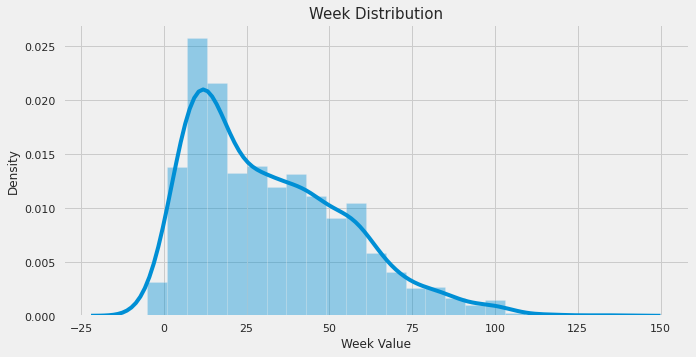

In [214]:
#Week
fig=plt.figure(figsize=(10,5))
sn.distplot(train['Weeks'])
plt.title('Week Distribution',size=15)
plt.xlabel('Week Value',size=12)
plt.ylabel('Density', size=12);

Most patient's FVC value is recorded in between week 1 and week 25. Also, week value can be negative too, which means FVC is measured before baseline CT scan.

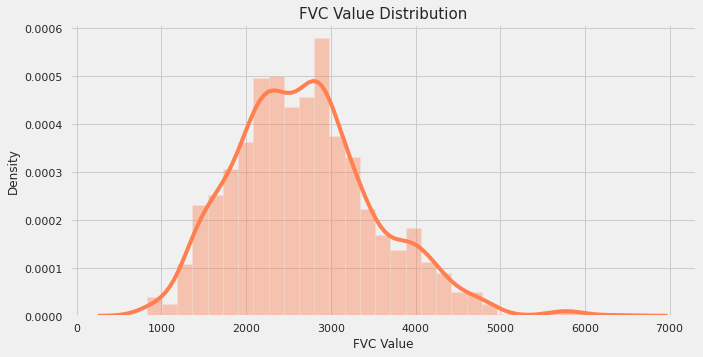

In [215]:
#FVC
fig=plt.figure(figsize=(10,5))
sn.distplot(train['FVC'], color='coral')
plt.title('FVC Value Distribution',size=15)
plt.xlabel('FVC Value',size=12)
plt.ylabel('Density', size=12);

FVC value is measured in ml, most of the patient's have FVC value between 2000ml and 3000ml. And very few patients have FVC more than 5000ml.

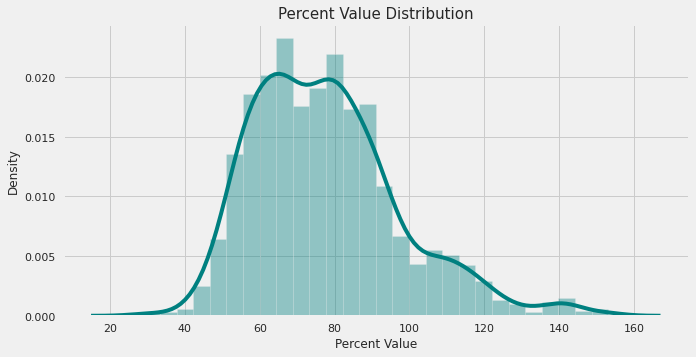

In [216]:
#Percent
fig=plt.figure(figsize=(10,5))
sn.distplot(train['Percent'], color='Teal')
plt.title('Percent Value Distribution',size=15)
plt.xlabel('Percent Value',size=12)
plt.ylabel('Density', size=12);


This Percent column is not the actual depiction os some percentage value.

**Analysing Patient's Age, Sex and Smoking status**

In [217]:
temp = train[['Patient','Age','Sex','SmokingStatus']].drop_duplicates()
temp

Patient  Age   Sex SmokingStatus
0     ID00007637202177411956430   79  Male     Ex-smoker
9     ID00009637202177434476278   69  Male     Ex-smoker
18    ID00010637202177584971671   60  Male     Ex-smoker
27    ID00011637202177653955184   72  Male     Ex-smoker
36    ID00012637202177665765362   65  Male  Never smoked
...                         ...  ...   ...           ...
1504  ID00419637202311204720264   73  Male     Ex-smoker
1513  ID00421637202311550012437   68  Male     Ex-smoker
1523  ID00422637202311677017371   73  Male     Ex-smoker
1531  ID00423637202312137826377   72  Male     Ex-smoker
1540  ID00426637202313170790466   73  Male  Never smoked

[176 rows x 4 columns]

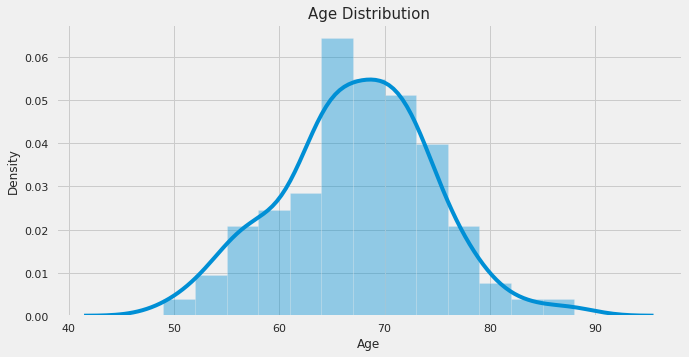

In [218]:
plt.figure(figsize=(10,5))
sn.distplot(temp['Age'],)
plt.title('Age Distribution',size=15)
plt.xlabel('Age',size=12)
plt.ylabel('Density', size=12);

In [219]:
print('Minimum age:', temp['Age'].min())
print('Maximum age:', temp['Age'].max())

Minimum age: 49
Maximum age: 88


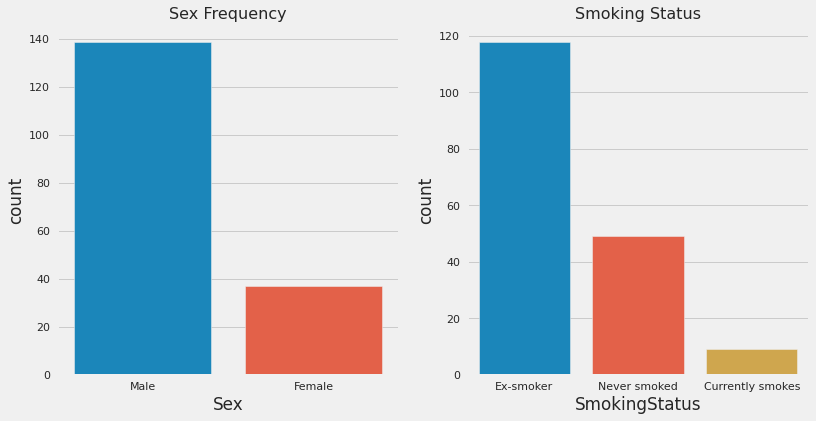

In [221]:
# Figure
f, (ax2, ax3) = plt.subplots(1, 2, figsize = (12, 6))

b = sn.countplot(x = "Sex",data=temp, ax=ax2,)
c = sn.countplot(x = "SmokingStatus",data= temp, ax=ax3,)


b.set_title("Sex Frequency", fontsize=16)
c.set_title("Smoking Status", fontsize=16);

**Dicom Data Analysis**

This is my first experience working with dicom data. DICOM stands for Digital Imaging and Communications in Medicine. It is a standard, internationally accepted format to view, store, retrieve and share medical images. DICOM is a format that has metadata, as well as Pixeldata attached to it.Some basic info can be extracted from image metadata: gender and age of the patient, as well as info how the image is sampled and generated.
As there are 176 patient in train data, so corresponding to each patient we have a folder(folder name=Patient id) which contains CT scan in DICOM format.

In [222]:
train_path = '/kaggle/input/osic-pulmonary-fibrosis-progression/train'
train_dir = os.listdir(train_path)
scan_per_patient = []
for dirc in train_dir:
    scans = len(os.listdir(train_path+'/'+dirc))
    scan_per_patient.append(scans)

In [223]:
train_CT = pd.DataFrame({'Patient_ID':train_dir,'Scans_Per_Patient':scan_per_patient})
train_CT

Patient_ID  Scans_Per_Patient
0    ID00015637202177877247924                295
1    ID00035637202182204917484                574
2    ID00290637202279304677843                240
3    ID00400637202305055099402                265
4    ID00073637202198167792918                355
..                         ...                ...
171  ID00086637202203494931510                 30
172  ID00216637202257988213445                 21
173  ID00240637202264138860065                 33
174  ID00248637202266698862378                 16
175  ID00233637202260580149633                405

[176 rows x 2 columns]

In [224]:
print('Minimum number of CT Scans:', train_CT['Scans_Per_Patient'].min())
print('Maximum number of CT Scans:', train_CT['Scans_Per_Patient'].max())
print('Average number of CT Scans:', train_CT['Scans_Per_Patient'].mean())

Minimum number of CT Scans: 12
Maximum number of CT Scans: 1018
Average number of CT Scans: 187.64772727272728


In [225]:
test_path = '/kaggle/input/osic-pulmonary-fibrosis-progression/test'
test_dir = os.listdir(test_path)
scan_per_patient = []
for dirc in test_dir:
    scans = len(os.listdir(test_path+'/'+dirc))
    scan_per_patient.append(scans)

In [226]:
test_CT = pd.DataFrame({'Patient_ID':test_dir,'Scans_Per_Patient':scan_per_patient})
test_CT

Patient_ID  Scans_Per_Patient
0  ID00419637202311204720264                 28
1  ID00421637202311550012437                 62
2  ID00422637202311677017371                473
3  ID00423637202312137826377                290
4  ID00426637202313170790466                408

In [228]:
# https://www.kdnuggets.com/2017/03/medical-image-analysis-deep-learning.html
path = '/kaggle/input/osic-pulmonary-fibrosis-progression/'
dicom_files = []  # create an empty list
for dirName, subdirList, fileList in os.walk(path):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            dicom_files.append(os.path.join(dirName,filename))

In [229]:
print('There are total {} dicom files given to us'.format(len(dicom_files)))

There are total 34287 dicom files given to us


In [230]:
dicom_files[:5]

['/kaggle/input/osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/12.dcm',
 '/kaggle/input/osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/18.dcm',
 '/kaggle/input/osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/9.dcm',
 '/kaggle/input/osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/22.dcm',
 '/kaggle/input/osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/25.dcm']

In [234]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# --- edit this path if needed ---
csv_path = "/kaggle/input/osic-pulmonary-fibrosis-progression/train.csv"

df = pd.read_csv(csv_path)
# Basic check
assert {"Patient","Weeks","FVC"}.issubset(set(df.columns)), "train.csv missing required columns"

rows = []
for pid, g in df.groupby("Patient"):
    gs = g.sort_values("Weeks")
    weeks = gs["Weeks"].values.reshape(-1,1)
    fvc = gs["FVC"].values
    n = len(fvc)
    first = float(fvc[0])
    last = float(fvc[-1])
    min_fvc = float(np.min(fvc))
    pct_decline = (first-last)/first*100.0 if n>=2 and first>0 else np.nan
    fvc_slope = np.nan
    if n>=2:
        fvc_slope = float(LinearRegression().fit(weeks, fvc).coef_[0])
    percent_slope = np.nan
    if "Percent" in gs.columns and len(gs["Percent"].values)>=2:
        percent_slope = float(LinearRegression().fit(weeks, gs["Percent"].values).coef_[0])
    rows.append({
        "Patient": pid,
        "n_obs": n,
        "first_fvc": first,
        "last_fvc": last,
        "min_fvc": min_fvc,
        "fvc_slope_per_week": fvc_slope,
        "percent_slope_per_week": percent_slope,
        "pct_decline_first_to_last": pct_decline
    })

pm = pd.DataFrame(rows).set_index("Patient")
pm['rank_fvc'] = pm['fvc_slope_per_week'].rank(method='min', ascending=True, na_option='bottom')
pm['rank_percent'] = pm['percent_slope_per_week'].rank(method='min', ascending=True, na_option='bottom')
pm['rank_percent'] = pm['rank_percent'].fillna(pm['rank_fvc'])
pm['combined_rank'] = pm['rank_fvc'] + pm['rank_percent']

top5_fvc = pm.sort_values('fvc_slope_per_week', ascending=True).head(5)
top5_combined = pm.sort_values('combined_rank', ascending=True).head(5)

print("Top 5 patients by steepest FVC decline (most negative fvc_slope_per_week):")
print(top5_fvc[['n_obs','first_fvc','last_fvc','fvc_slope_per_week','pct_decline_first_to_last']])

print("\nTop 5 patients by combined rank (FVC slope + Percent slope if available):")
print(top5_combined[['n_obs','first_fvc','last_fvc','fvc_slope_per_week','percent_slope_per_week','pct_decline_first_to_last','combined_rank']])

print("\nTop 5 patient IDs (combined):")
print(list(top5_combined.head(5).index))

print("\nTop 5 patient IDs (FVC slope alone):")
print(list(top5_fvc.head(5).index))


Top 5 patients by steepest FVC decline (most negative fvc_slope_per_week):
                           n_obs  first_fvc  last_fvc  fvc_slope_per_week  \
Patient                                                                     
ID00110637202210673668310      8     1995.0     919.0          -28.182575   
ID00249637202266730854017      8     3255.0    2161.0          -24.291011   
ID00052637202186188008618      7     2489.0    1848.0          -23.287500   
ID00398637202303897337979      8     3046.0    2083.0          -23.114529   
ID00414637202310318891556      9     2619.0    1612.0          -20.453681   

                           pct_decline_first_to_last  
Patient                                               
ID00110637202210673668310                  53.934837  
ID00249637202266730854017                  33.609831  
ID00052637202186188008618                  25.753315  
ID00398637202303897337979                  31.615233  
ID00414637202310318891556                  38.449790  


In [235]:
pip install pydicom matplotlib numpy scikit-learn

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


pydicom already installed.
Total files found under /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/: 211
Candidate files for reading: 211 (showing up to 20 examples):
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/1.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/10.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/100.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/101.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/102.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/103.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/104.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/105.dcm
 - /kaggle/input/osic-pulmonary-fibrosis-progression/train

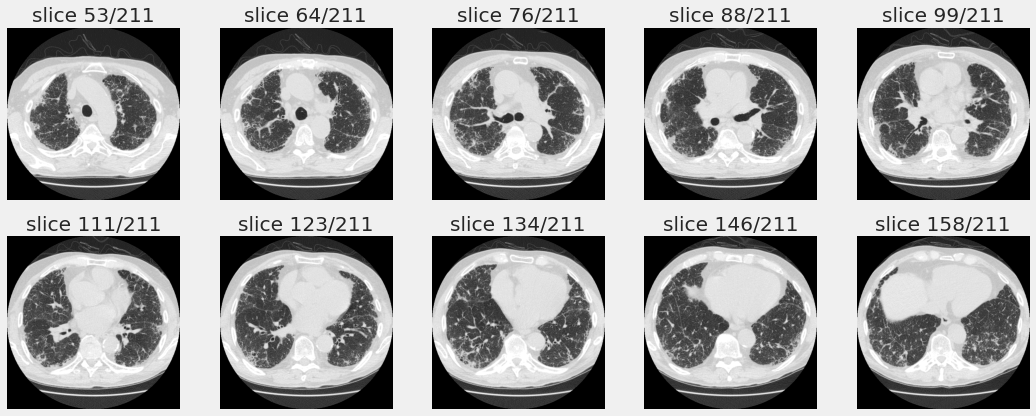


Displaying 20 sampled slices (20-sample).


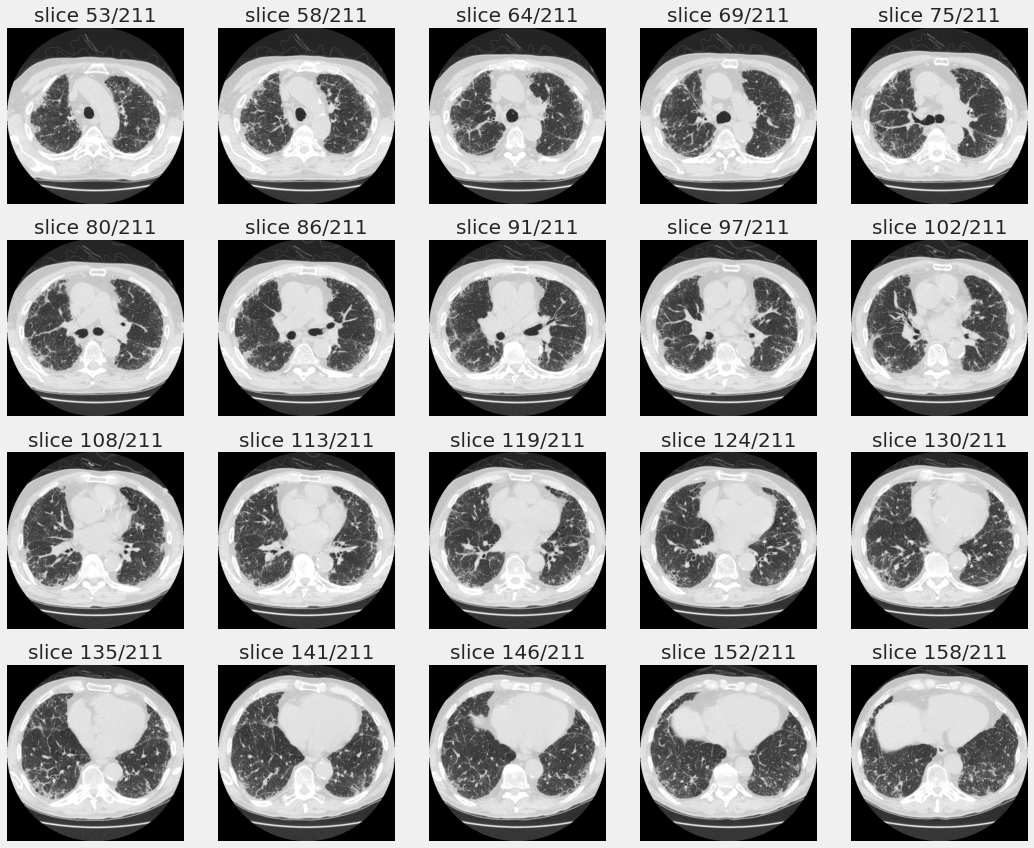

In [236]:
# Run this in your Kaggle notebook (where the path exists).
# It installs pydicom if needed, counts files, and displays 10 / 20 sampled central slices.

patient_dir = "/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00110637202210673668310/"

from pathlib import Path
import os, math
import numpy as np
import matplotlib.pyplot as plt

p = Path(patient_dir)
if not p.exists():
    raise FileNotFoundError(f"Provided path does not exist: {patient_dir}")

# install pydicom if missing (Kaggle allows pip installs in cells)
try:
    import pydicom
    from pydicom.pixel_data_handlers.util import apply_voi_lut
    print("pydicom already installed.")
except Exception:
    print("Installing pydicom...")
    !pip install -q pydicom
    import pydicom
    from pydicom.pixel_data_handlers.util import apply_voi_lut
    print("pydicom installed.")

# collect files
files = sorted([str(fp) for fp in p.rglob("*") if fp.is_file()])
print(f"Total files found under {patient_dir}: {len(files)}")

# heuristics to pick likely DICOM files
likely = []
for f in files:
    lf = f.lower()
    if lf.endswith((".dcm", ".dicom", ".ima")) or ("dcm" in lf and lf.count('.')<=2) or 'image' in lf:
        likely.append(f)
# fallback: if nothing matched, use all files
if not likely:
    likely = files

print(f"Candidate files for reading: {len(likely)} (showing up to 20 examples):")
for ex in likely[:20]:
    print(" -", ex)

# read DICOMs
datasets = []
for fp in likely:
    try:
        ds = pydicom.dcmread(fp, force=True)
        datasets.append((fp, ds))
    except Exception:
        pass

print(f"Readable DICOM files: {len(datasets)}")
if len(datasets) == 0:
    raise RuntimeError("No readable DICOM files found among candidates. Check that the folder contains .dcm files or use the directory where individual slice files are stored.")

# sorting function
def sort_key(item):
    fp, ds = item
    inst = getattr(ds, "InstanceNumber", None)
    if inst is not None:
        return int(inst)
    sl = getattr(ds, "SliceLocation", None)
    if sl is not None:
        return float(sl)
    ipp = getattr(ds, "ImagePositionPatient", None)
    if ipp is not None and isinstance(ipp, (list, tuple)) and len(ipp) >= 3:
        return float(ipp[2])
    return fp

datasets = sorted(datasets, key=sort_key)
print("First 5 readable files (sorted):")
for fp, _ in datasets[:5]:
    print(" -", fp)

# extract pixel arrays
imgs = []
fps = []
for fp, ds in datasets:
    try:
        arr = ds.pixel_array
        try:
            arr = apply_voi_lut(arr, ds)
        except Exception:
            pass
        intercept = getattr(ds,'RescaleIntercept',0.0)
        slope = getattr(ds,'RescaleSlope',1.0)
        arr = arr.astype(np.float32) * float(slope) + float(intercept)
        imgs.append(arr)
        fps.append(fp)
    except Exception:
        pass

n = len(imgs)
print(f"Extracted pixel arrays: {n} slices.")
if n == 0:
    raise RuntimeError("No pixel data extracted — DICOMs may be non-standard or compressed.")

imgs = np.stack(imgs, axis=0)

# sample central region (25%..75%)
start = int(n*0.25); end = int(n*0.75)
if end <= start:
    start = 0; end = n
central = list(range(start, end))

def sample_indices(total_indices, k):
    if len(total_indices) <= k:
        return total_indices
    return [ total_indices[int(i * (len(total_indices)-1) / (k-1))] for i in range(k) ]

def normalize(im):
    lo = np.percentile(im, 1)
    hi = np.percentile(im, 99)
    im = np.clip(im, lo, hi)
    return (im - lo) / (hi - lo + 1e-9)

# Display 10-sample
k1 = min(10, len(central))
idxs1 = sample_indices(central, k1)
print(f"\nDisplaying {len(idxs1)} sampled slices from central indices {start}..{end-1} of {n} total slices.")
cols = min(5, len(idxs1)); rows = math.ceil(len(idxs1)/cols)
plt.figure(figsize=(cols*3, rows*3))
for i, idx in enumerate(idxs1):
    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(normalize(imgs[idx]), cmap='gray')
    ax.set_title(f"slice {idx+1}/{n}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Display 20-sample if available
if len(central) >= 20:
    k2 = 20
    idxs2 = sample_indices(central, k2)
    print(f"\nDisplaying {len(idxs2)} sampled slices (20-sample).")
    cols = min(5, len(idxs2)); rows = math.ceil(len(idxs2)/cols)
    plt.figure(figsize=(cols*3, rows*3))
    for i, idx in enumerate(idxs2):
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(normalize(imgs[idx]), cmap='gray')
        ax.set_title(f"slice {idx+1}/{n}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough central slices to sample 20 images.")
